# Predicción del precio de casas

La predicción del precio de viviendas es un problema clásico donde la regresión lineal se aplica de forma efectiva. Factores como el tamaño en pies cuadrados, número de habitaciones, ubicación, entre otros, son variables que influyen directamente en el precio de una casa. Es un caso realista, con abundante información disponible y una aplicación práctica directa.



### Importar librerías necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Cargamos el dataset

In [3]:
df = pd.read_csv('train.csv')

### Verificar el contenido y limpieza inicial 

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.shape

(1460, 81)

In [7]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### Revisamos columnas que vamos a usar

In [8]:
df[['GrLivArea', 'SalePrice']].isnull().sum()

GrLivArea    0
SalePrice    0
dtype: int64

### Eliminamos valores atípicos

Quitamos outliers

In [9]:
df = df[df['GrLivArea'] < 4500]

### Seleccionamos variables (GrLivArea como variable independiente y SalePrice como variable dependiente)

In [14]:
X = df[['GrLivArea']].values
y = df['SalePrice'].values

### Dividimos en datos de entrenamiento y prueba

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Crear y entrenar el modelo de regresion lineal

In [16]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

### Realizar predicciones 

In [17]:
y_pred = modelo.predict(X_test)

### Evaluar el modelo

In [19]:
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse:.2f}")

Error cuadrático medio: 2808244730.25


### Visualizacion

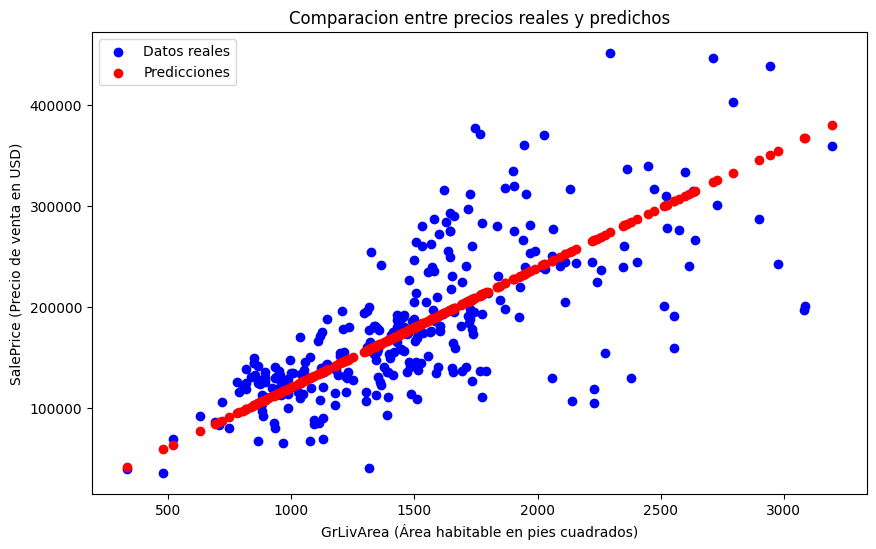

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.scatter(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('GrLivArea (Área habitable en pies cuadrados)')
plt.ylabel('SalePrice (Precio de venta en USD)')
plt.title('Comparacion entre precios reales y predichos')
plt.legend()
plt.show()